## Observations and Insights 

1. Capomulin and Ramicane were the most used drug regimens and have a lower mean volume of final tumor than the drug regimens Infubinol and Ceftamin.

2. The Capomulin-treated s185 mouse shows a tumor volume decrease of approximately 50% from the first to the last timeponit in which it was evaluated.

3. The correlation coefficient between the average volume of the tumor and the weight of the mice is positive and approximate to 1, which means that there is a positive relation between them, when one of them increases the other one increases and vice versa.


In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
#checking the number of items.

ids_num = len(mouse_df["Mouse ID"])

ids_num

1893

In [33]:
# Checking the number of mice.

mice_num = len(mouse_df["Mouse ID"].unique())

mice_num

249

In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

mice_duplicated = mouse_df[mouse_df.duplicated(["Mouse ID", "Timepoint"])]

mice_duplicated



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mice_df = mouse_df.set_index("Mouse ID")

mice_df = mice_df.drop(index='g989', axis=0)

mice_df = mice_df.reset_index()

mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [36]:
# Checking the number of mice in the clean DataFrame.

mice_num2 = len(mice_df["Mouse ID"].unique())

mice_num2



248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

statistics_table = mice_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

statistics_mean = statistics_table["Tumor Volume (mm3)"].mean()

statistics_median = statistics_table["Tumor Volume (mm3)"].median()

statistics_var = statistics_table["Tumor Volume (mm3)"].var()

statistics_std = statistics_table["Tumor Volume (mm3)"].std()

statistics_sem = statistics_table["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.

statistics_table_df = pd.DataFrame({"Mean":statistics_mean, "Median":statistics_median, "Variance":statistics_var, 
                                   "Standard Deviantion":statistics_std, "SEM":statistics_sem})


statistics_table_df




,Mean,Median,Variance,Standard Deviantion,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_table_df = mice_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})


agg_table_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

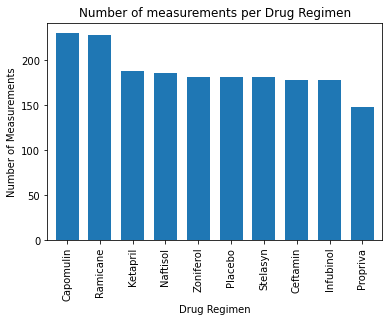

In [39]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.


drugregimen_chart = mice_df["Drug Regimen"].value_counts()

drugregimen_chart.plot(kind="bar", width = 0.7)

plt.title("Number of measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")


plt.show()




In [40]:
#Calculating the number of Drug Regimen

drugregimen_chart = mice_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

drugregimen_chart


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Number of Measurements')

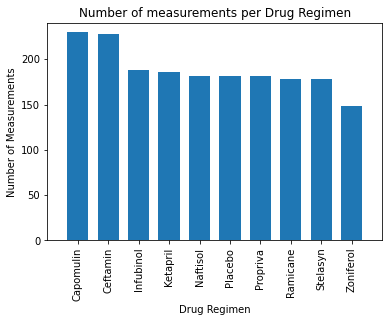

In [41]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#y_axis
drugregimen = mice_df['Drug Regimen'].value_counts()

#x_axis
x_axis = np.arange(len(drugregimen))

#plot
plt.bar(x_axis, drugregimen, width=0.7)

#x_axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", 
                            "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation='vertical')


#x limits
plt.xlim(-1, len(x_axis))

#y limits
plt.ylim(0, max(drugregimen)+10)


plt.title("Number of measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")



In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#df unique number of male and female
gender = mice_df.groupby(["Mouse ID", "Sex"])

gender_df = pd.DataFrame(gender.size())


#df count of male and female
mouse_gender_df = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender_df.columns = ["Total Count"]


#percentage of male and female
mouse_gender_df["Percentage of Sex"] = (mouse_gender_df["Total Count"]/mouse_gender_df["Total Count"].sum())


#formatting
mouse_gender_df["Percentage of Sex"] = mouse_gender_df["Percentage of Sex"].map("{:,.2%}".format)



mouse_gender_df




,Total Count,Percentage of Sex
Sex,,
Female,123,49.60%
Male,125,50.40%


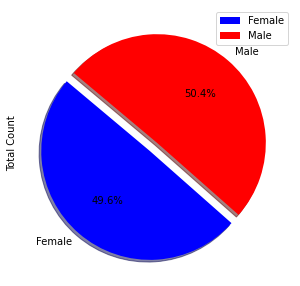

In [43]:
#plot pie
#plot = df.plot.pie(y=, figsize=, colors=, startangle=, explode=, shadow=, autopct=)

colors = ['blue', 'red']
explode = (0.1, 0)

plot = mouse_gender_df.plot.pie(y="Total Count", figsize=(5,5), colors=colors, startangle=140, explode=explode, shadow=True, autopct="%1.1f%%")



(-1.1877265930885335,
 1.1112071628288431,
 -1.1963696973319076,
 1.1123740819715626)

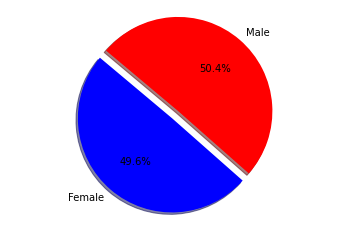

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sizes = [49.6, 50.4]

explode = (0.1, 0)

labels = ["Female", "Male"]

colors = ['blue', 'red']


#plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)


plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_df = pd.DataFrame(mice_df.groupby("Mouse ID")["Timepoint"].max().sort_values())

max_df = max_df.reset_index().rename(columns= {"Timepoint": "Max TP"})


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_timepoint_df = pd.merge(mice_df, max_df, on="Mouse ID")

last_timepoint_df.head(15)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max TP
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
5,k403,Ramicane,Male,21,16,25,33.464577,1,45
6,k403,Ramicane,Male,21,16,30,31.099498,1,45
7,k403,Ramicane,Male,21,16,35,26.546993,1,45
8,k403,Ramicane,Male,21,16,40,24.365505,1,45
9,k403,Ramicane,Male,21,16,45,22.050126,1,45


In [46]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:
    
    volume_df = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == treatment]
    final_volume_df = volume_df.loc[volume_df["Timepoint"] == volume_df["Max TP"]]
    
    # add subset 
    
    values = final_volume_df["Tumor Volume (mm3)"]
    tumor_vol.append(values)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = values.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"IQR for {treatment}: {iqr}")
    
    
    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq+(1.5*iqr)
          
    print(f"Lower Bound for {treatment}: {lower_bound}")
    print(f"Upper Bound for {treatment}: {upper_bound}")

    print(f"Values below {lower_bound} could be outliers")
    print(f"Values above {upper_bound} could be outliers")
    
    
    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Values below 17.912664470000003 could be outliers
Values above 54.30681135 could be outliers
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Values below 36.83290494999999 could be outliers
Values above 82.74144559000001 could be outliers
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Values below 25.355449580000002 could be outliers
Values above 87.66645829999999 could be outliers


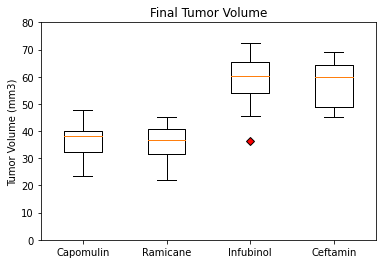

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#formatting the outliers
diamond = dict(markerfacecolor='r', marker='D')
plt.subplots()

#plot
plt.boxplot(tumor_vol, flierprops=diamond)
plt.xticks([1, 2, 3, 4], treatments)
plt.title("Final Tumor Volume")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim([0,80])
plt.show()



## Line and Scatter Plots

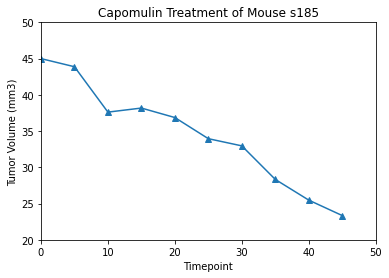

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

treatment_df = mice_df.loc[mice_df["Mouse ID"] == 's185']

plt.plot(treatment_df["Timepoint"], treatment_df["Tumor Volume (mm3)"], marker = '^')
plt.title("Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,50)
plt.ylim(20,50)
plt.show()


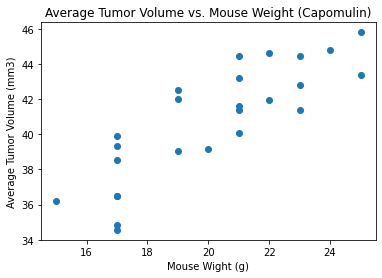

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#df with just drug regimen = capomulin
capomulin_df = mice_df.loc[mice_df["Drug Regimen"] == 'Capomulin']

#df with avg tumor volume column
avg_tumor_df = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
avg_tumor_df = avg_tumor_df.reset_index().rename(columns={"Tumor Volume (mm3)": "Avg Tumor Vol"})

#merge both dfs
avg_df = pd.merge(capomulin_df, avg_tumor_df, on="Mouse ID")

#drop duplicates
avg_vol_df = avg_df[["Weight (g)", "Avg Tumor Vol"]].drop_duplicates()


#plot
plt.scatter(avg_vol_df["Weight (g)"], avg_vol_df["Avg Tumor Vol"])
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Mouse Wight (g)")
plt.show()


## Correlation and Regression

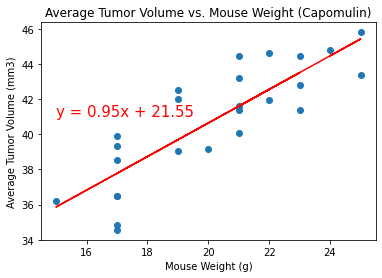

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#declare var
weight = avg_vol_df["Weight (g)"]
avg_vol = avg_vol_df["Avg Tumor Vol"]

#linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_vol)
regress_values = weight * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(weight, avg_vol)
plt.plot(weight, regress_values, "-r")
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.annotate(line_eq,(15,41),fontsize=15,color="red")
plt.show()



In [51]:
print (f"The correlation coefficient between average tumor volume and mouse weight is {round(st.pearsonr(weight,avg_vol)[0],2)}")


The correlation coefficient between average tumor volume and mouse weight is 0.84
